## Environment Setup

In [1]:
#!pip install openpyxl

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [3]:
eautos_2023 = pd.read_csv("./clean_data/eautos_2023.csv")
population = pd.read_csv('./clean_data/population_states_stations.csv')


In [4]:

population_2023 = population.merge (eautos_2023, left_on ="State", right_on="Land", how = "left")

population_2023.drop (columns = "Land", inplace = True)

population_2023.to_csv('./clean_data/population_stations_cars.csv', index = False)
population_2023


,State,Total,Area,Density,Number of stations,Total cars
0,Baden-Württemberg,3574785,3574785,316,5678,177930
1,Bayern,7054158,7054158,190,6722,208318
2,Berlin,89112,89112,4214,954,32714
3,Brandenburg,2965438,2965438,87,737,21933
4,Bremen,41961,41961,1632,247,5446
5,Hamburg,75509,75509,2506,616,23517
6,Hessen,2111562,2111562,303,2399,107291
7,Mecklenburg-Vorpommern,2329490,2329490,70,391,10290
8,Niedersachsen,4770990,4770990,171,3203,115272
9,Nordrhein-Westfalen,3411272,3411272,532,5878,266568


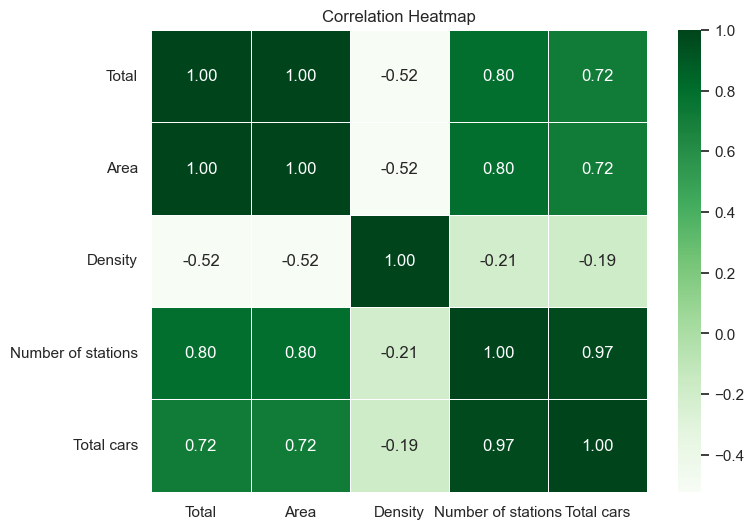

In [5]:
# Compute the correlation matrix
corr_matrix = population_2023.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


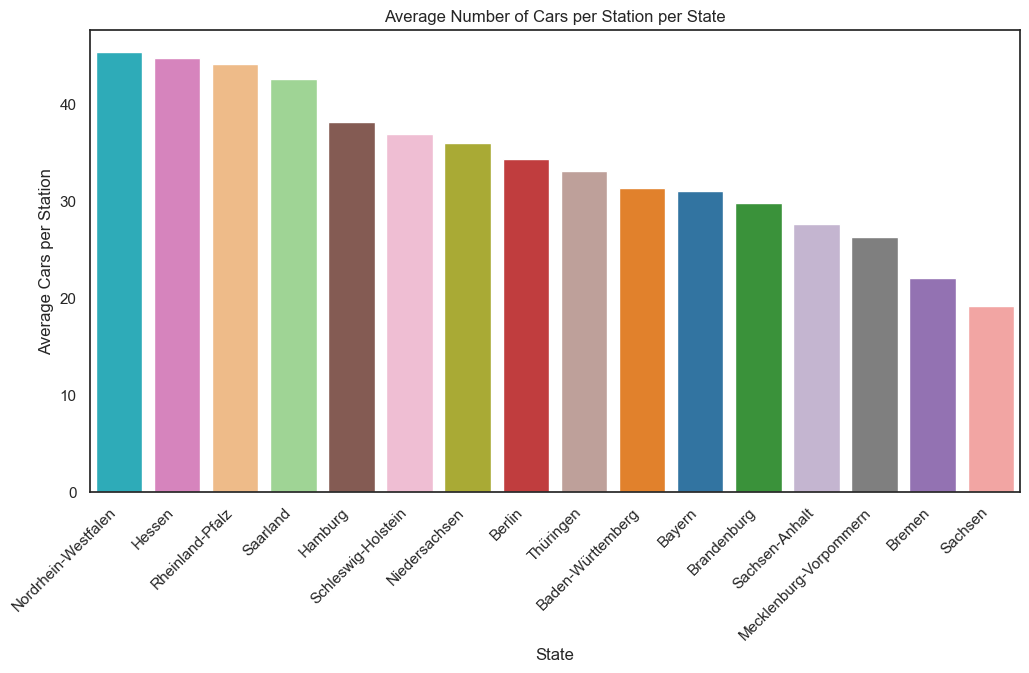

In [6]:
# Calculate the average cars per station
population_2023["Cars per station"] = population_2023["Total cars"] / population_2023["Number of stations"]

# Sort values for better visualization
df_sorted = population_2023.sort_values("Cars per station", ascending=False)

# Plot
plt.figure(figsize=(12, 6))

sns.barplot(x = "State", y = "Cars per station", data= df_sorted, palette = german_states_colors)

plt.xlabel("State")
plt.ylabel("Average Cars per Station")
plt.title("Average Number of Cars per Station per State")
plt.xticks(rotation=45, ha="right")
plt.show()
